In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
path = ['AAPL', 'AMZN', 'BAC', 'F',
             'GOOG', 'IBM', 'INTC', 'NVDA', 'XOM']
data = np.load('Resultados/Best_Genes/Best_AAL.npy')
values = np.load('Resultados/Value/Val_AAL.npy')
# load data
for i in path:
    data = np.vstack((data, np.load('Resultados/Best_Genes/Best_' + i + '.npy')))
    values = np.vstack((values, np.load('Resultados/Value/Val_' + i + '.npy')))
print(data.shape)
print(values.shape)
# print(values[0, :])

(300, 6)
(10, 30)


In [ ]:
path = ['AAPL', 'AMZN', 'BAC', 'F',
             'GOOG', 'IBM', 'INTC', 'NVDA', 'XOM']
data = np.load('Resultados/Best_Genes/Best_AAL.npy')
# load data
for i in path:
    data = np.vstack((data, np.load('Resultados/Best_Genes/Best_' + i + '.npy')))
print(data.shape)

genes = ['RSI_short', 'RSI_long', 'lll', 'ull', 'lls', 'uls']

# create a single figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# create 6 histograms, one for each gene
for i, ax in enumerate(axes.flat):
    u, inv = np.unique(data[:, i], return_inverse=True)
    counts = np.bincount(inv)
    ax.bar(u, counts, width=4.0)
    if i > 1:
        ax.set_xticks(np.arange(0, 105, 5))
    else:
        ax.set_xticks(np.arange(7, 28, 7))
    ax.set_title('Gene: ' + genes[i])
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')
    if i > 1:
        ax.set_xlim([-5, 105])
        ax.set_ylim([0, 90])
    else:
        ax.set_xlim([0, 27])
        ax.set_ylim([0, 130])
# adjust layout
plt.tight_layout()

# display the plot
plt.show()


[[0.96561578 1.         0.96561578 0.58299567 1.         0.61737989
  0.12142932 0.58299567 0.         1.         0.93702051 1.
  0.61737989 0.96561578 0.96561578 1.         0.58299567 0.4964328
  0.96561578 1.         0.96561578 1.         1.         0.96561578
  0.64068092 1.         1.         1.         1.         0.96561578]]
(10, 30)
[[0.96561578 1.         0.96561578 0.58299567 1.         0.61737989
  0.12142932 0.58299567 0.         1.         0.93702051 1.
  0.61737989 0.96561578 0.96561578 1.         0.58299567 0.4964328
  0.96561578 1.         0.96561578 1.         1.         0.96561578
  0.64068092 1.         1.         1.         1.         0.96561578]
 [0.76351276 0.98210006 0.78141271 0.78141271 1.         0.
  0.78141271 0.76351276 1.         0.78141271 0.11167137 0.98210006
  0.93767759 0.78141271 0.98210006 0.7190903  1.         0.78141271
  1.         0.7190903  0.98210006 0.78141271 0.29741839 0.78141271
  0.7190903  0.68384026 1.         0.7190903  0.50604161 0.982

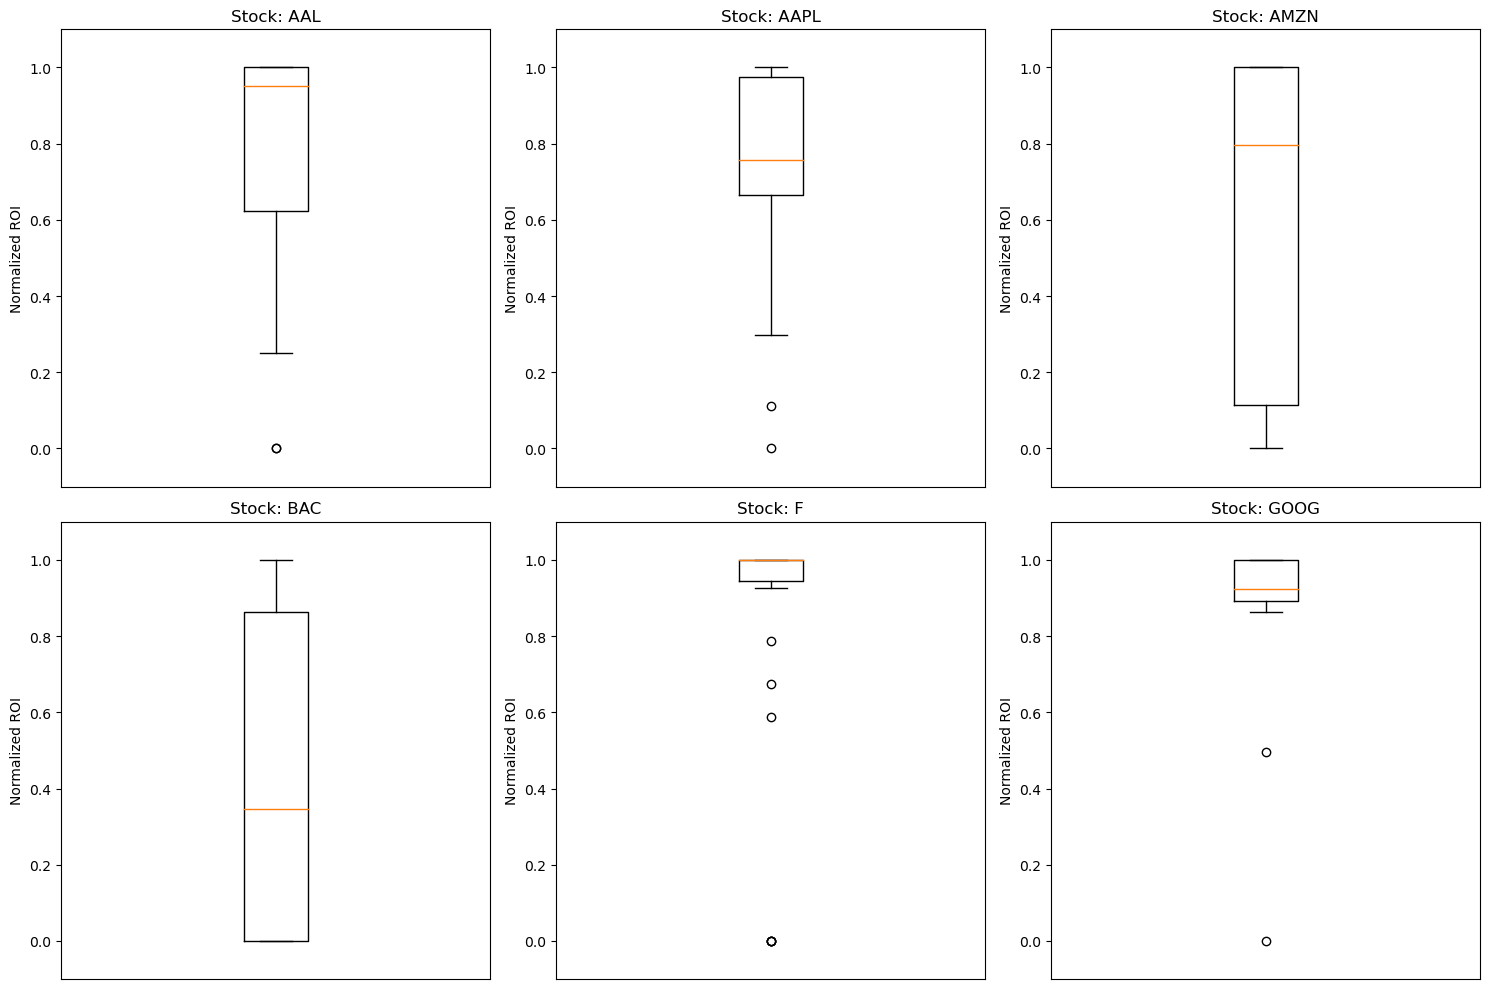

In [134]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

path = ['AAPL', 'AMZN', 'BAC', 'F',
             'GOOG', 'IBM', 'INTC', 'NVDA', 'XOM']
values = np.load('Resultados/Value/Val_AAL.npy').reshape(-1, 1)
scaler.fit(values)
values = scaler.transform(values).reshape(1, -1)
print(values)
# load data
for i in path:
    values_aux = np.load('Resultados/Value/Val_' + i + '.npy').reshape(-1, 1)
    scaler.fit(values_aux)
    values_aux = scaler.transform(values_aux).reshape(1, -1)
    values = np.vstack((values, values_aux))
    
print(values.shape)

print(values)

stocks = ['AAL', 'AAPL', 'AMZN', 'BAC', 'F',
             'GOOG', 'IBM', 'INTC', 'NVDA', 'XOM']

# Normalize values

scaler.fit(values)

values = scaler.transform(values)

# create a single figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# box plot of each stock
for i, ax in enumerate(axes.flat):
    ax.boxplot(values[i, :])
    ax.set_title('Stock: ' + stocks[i])
    ax.set_ylabel('Normalized ROI')
    ax.set_ylim([-0.1, 1.1])
    ax.set_xticks([])

# adjust layout
plt.tight_layout()

# display the plot
plt.show()